# Class \#13 activities

# **Arctic sea ice satellite measurements**
### Practice with Matplotlib, Cartopy, and xarray

<img src="https://drive.google.com/uc?export=view&id=1q3Zg5PRt_cPDldujoswh7Uvs47T_7U9q" width="1500" />

1. Uncomment the blocks of code with the installation lines (`!pip install`, etc.). Remember the shortcut to uncomment/comment multiple lines is `Command-/` on Macs or `Control-/` on Windows.

2. Then run this cell to install the packages, import libraries, and give Colab access to Google Drive.

3. When prompted, click the link to give Colab access to Google Drive, copy the code, and paste back into here.

In [ ]:
# # This code installs the netCDF4 module
# # Run this code once per session, then comment it out
# !pip install netcdf4

# # This code allows Cartopy to work with Google Colab
# # Run this code once per session, then comment it out
# !grep '^deb ' /etc/apt/sources.list | \
#   sed 's/^deb /deb-src /g' | \
#   tee /etc/apt/sources.list.d/deb-src.list
# !apt-get -qq update
# !apt-get -qq build-dep python3-cartopy
# !pip uninstall -y shapely
# !pip install shapely --no-binary shapely
# !pip install cartopy

# Import NumPy, xarray, Matplotlib, Cartopy (and related imports)
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. Next, update the filepath below. To find the correct filepath, you can click on the left sidebar (folder icon), navigate to the Class #13 data folder, click the "..." on the file, and select "Copy path."

5. Add back slashes (`\`) in front of quotation marks in the filepath, as necessary.

In [ ]:
# Filepath for Arctic sea ice concentration netCDF file
filepath = '/content/drive/MyDrive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-17 - class #13 - data/nsidc_sea_ice_cdr_north.nc'

6. Run the code cell to load and display the netCDF file using `xarray`.

7. Notice that there are three dimensions: **lat** (50-90°N), **lon** (-180°E to 180°E), and **time** (1978 to 2020). The data are monthly in **time**.

In [ ]:
# Load netCDF file using xarray
data = xr.open_dataset(filepath)

# Display netCDF file
display(data)

<xarray.Dataset>
Dimensions:       (lat: 160, lon: 720, time: 503)
Coordinates:
  * time          (time) datetime64[ns] 1978-11-01 1978-12-01 ... 2020-10-01
  * lon           (lon) float64 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * lat           (lat) float64 50.0 50.25 50.5 50.75 ... 89.0 89.25 89.5 89.75
    month         (time) int64 ...
Data variables:
    sea_ice_conc  (time, lat, lon) float64 ...

# **Breakout rooms: group 1 — Chukchi Sea time series**

<img src="https://drive.google.com/uc?export=view&id=1N225WxUrPvg2IktTat_1-OidPSlP9YgQ" width="800" />

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, ask the Coder to paste their code into the chat, then copy and paste it into this [Google Document](https://docs.google.com/document/d/1706OxGibOKR9HECvyZJhAsC75ar0HOoe5WPPvfLeFdk/edit?usp=sharing)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


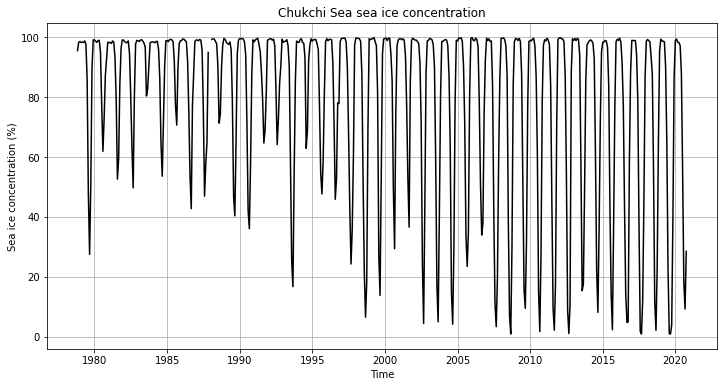

In [ ]:
# 1. Write one line of code to select the Chukchi Sea region from your "data" variable.
#    Save this as a new variable called "chukchi".
chukchi = data.sel(lat=slice(70,75),lon=slice(-180,-140))

# 2. Write one line of code to calculate the mean of "chukchi" over the latitude and longitude dimensions.
#    Save this as a new variable called "chukchi_time_series"
chukchi_time_series = chukchi.mean(dim=['lat','lon'])

# 3. Set up a figure with a width of 12 and height of 6.
plt.figure(figsize=(12,6))

# 4. Plot "chukchi_time_series" (time vs. sea ice concentration) using a black line.
#    Make sure sea ice concentration has units of 0% to 100%, not 0.0 to 1.0.
plt.plot(chukchi_time_series['time'], 100 * chukchi_time_series['sea_ice_conc'],c='k')

# 5. Label your axes, add a title, and add a grid.
plt.xlabel('Time')
plt.ylabel('Sea ice concentration (%)')
plt.title('Chukchi Sea sea ice concentration')
plt.grid()

# 6. If you have time, answer the following questions:
#    a. What long-term trend do you see?
#    b. In 1980, was there sea ice in the Chukchi Sea year-round? How do you know?
#    c. In 2019, was there sea ice in the Chukchi Sea year-round? How do you know?
#    d. In 2019, was there a time of the year where the entire Chukchi Sea was covered by sea ice?

# **Breakout rooms: group 2 — Chukchi Sea histogram**

<img src="https://drive.google.com/uc?export=view&id=1N225WxUrPvg2IktTat_1-OidPSlP9YgQ" width="800" />

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, ask the Coder to paste their code into the chat, then copy and paste it into this [Google Document](https://docs.google.com/document/d/1706OxGibOKR9HECvyZJhAsC75ar0HOoe5WPPvfLeFdk/edit?usp=sharing)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Grid cell count')

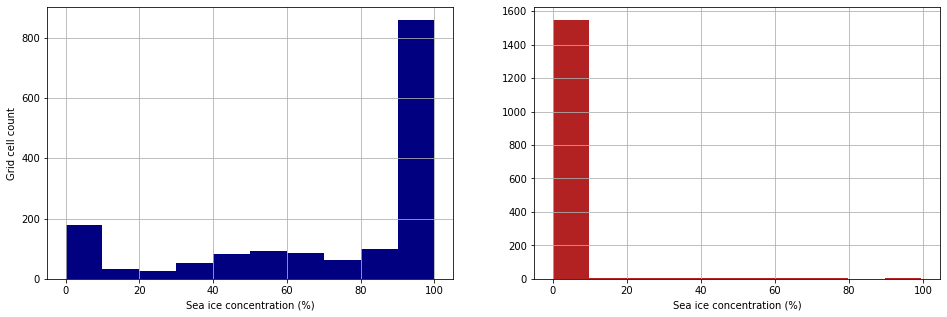

In [ ]:
# 1. Write one line of code to select the Chukchi Sea region from your "data" variable.
#    Save this as a new variable called "chukchi".
chukchi = data.sel(lat=slice(70,75),lon=slice(-180,-140))

# 2. Write two lines of code to select the sea ice concentration data from "chukchi"
#    from September 1980 and September 2019.
#
#    Save these as new variables called "chukchi_1980" and "chukchi_2019".
chukchi_1980 = chukchi['sea_ice_conc'].sel(time='1980-09')
chukchi_2019 = chukchi['sea_ice_conc'].sel(time='2019-09')
# or: chukchi_2019 = chukchi.sel(time=slice(datetime(2019,9,1),datetime(2019,9,30)))

# 3. Those two variables are 2-D and in xarray format.  Write two lines of code
#    to convert those two variables into flattened (1-D) NumPy arrays.
chukchi_1980 = chukchi_1980.values.flatten()
chukchi_2019 = chukchi_2019.values.flatten()

# 4. To speed things up, I've set up a figure with two subplots (1 row, 2 columns).
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(16,5))

# 5. On the left subplot, create a histogram of the September 1980 sea ice data.
#    Make sure sea ice concentration has units of 0% to 100%, not 0.0 to 1.0.
#    Set the color to 'navy' and the transparency to 80%.
ax0.hist(100*chukchi_1980,color='navy')

# 6. On the right subplot, create a histogram of the September 2019 sea ice data.
#    Make sure sea ice concentration has units of 0% to 100%, not 0.0 to 1.0.
#    Set the color to 'firebrick' and the transparency to 80%.
ax1.hist(100*chukchi_2019,color='firebrick')

# 7. Add a grid to both subplot axes. Add axis labels.
ax0.grid()
ax1.grid()
ax0.set_xlabel('Sea ice concentration (%)')
ax1.set_xlabel('Sea ice concentration (%)')
ax0.set_ylabel('Grid cell count')

# 8. If you have time, answer the following questions:
#    a. In 1980, were there areas of the Chukchi Sea with full sea ice cover?
#    b. In 2019, were there areas of the Chukchi Sea with full sea ice cover?
#    c. What other differences do you see between September 1980 and September 2019?

# **Breakout rooms: group 3 — Arctic sea ice map (September 1980)**

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, ask the Coder to paste their code into the chat, then copy and paste it into this [Google Document](https://docs.google.com/document/d/1706OxGibOKR9HECvyZJhAsC75ar0HOoe5WPPvfLeFdk/edit?usp=sharing)

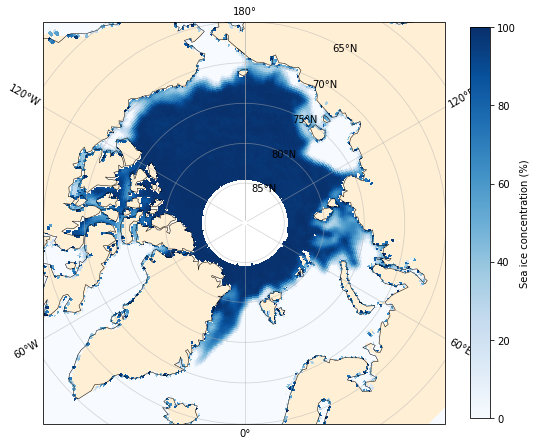

In [ ]:
# 1. Write one lines of code to select the sea ice concentration data from September 1980.
#    Save this as a new variable called "sic_1980".
sic_1980 = data['sea_ice_conc'].sel(time='1980-09')

# 2. This variable will still be 3-D, but the time dimension has just a single time.
#    To get rid of the unneeded time dimension and make the data truly 2-D,
#    use this code to "squeeze" out the time dimension.
sic_1980 = sic_1980.squeeze()

# 3. Use this code to set up a blank figure and set the axes to use Cartopy's Arctic map projection,
#    AKA a "northern polar stereographic" projection with a central longitude of 0°.
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))

# 4. Set the map extent to -180°E to 180°E in longitude, 65-90°N in latitude.
ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())

# 5. Plot the sea ice data (your variable "sic_1980") using pcolormesh().
#    - Recall that pcolormesh() takes the X values, Y values, and Z values as arguments.
#    - Don't forget to specify the 'transform' argument.
#    - Make sure sea ice concentration has units of 0% to 100%, not 0.0 to 1.0.
#    - Specify the colormap as 'Blues'.
pcm = ax.pcolormesh(sic_1980['lon'],sic_1980['lat'],100*sic_1980.values,
                    transform=ccrs.PlateCarree(),cmap='Blues')

# 6. Add a colorbar.
#    Then label the colorbar "Sea ice concentration (%)".
cbar = plt.colorbar(pcm,ax=ax,shrink=0.8)
cbar.set_label('Sea ice concentration (%)')

# 7. Try to add some formatting to the map. If you get stuck on any of these, just move on a different part.
#    - Add coastlines with a resolution of 110 m and line width of 0.5 to the map.
#    - Add gridlines to the map with a transparency of 50%.
#    - Add the land feature to the map with the color 'papayawhip'.
cs = ax.coastlines(resolution='110m',linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0.5)
ax.add_feature(cfeature.LAND, color='papayawhip')

# **Breakout rooms: group 4 — Arctic sea ice map (September 2019)**

First, assign roles:
> * **Timekeeper:** keep things moving
>
> * **Coder:** share your screen and write the code based on input from everyone else
>
> * **Reporter:** before the end of the session, ask the Coder to paste their code into the chat, then copy and paste it into this [Google Document](https://docs.google.com/document/d/1706OxGibOKR9HECvyZJhAsC75ar0HOoe5WPPvfLeFdk/edit?usp=sharing)

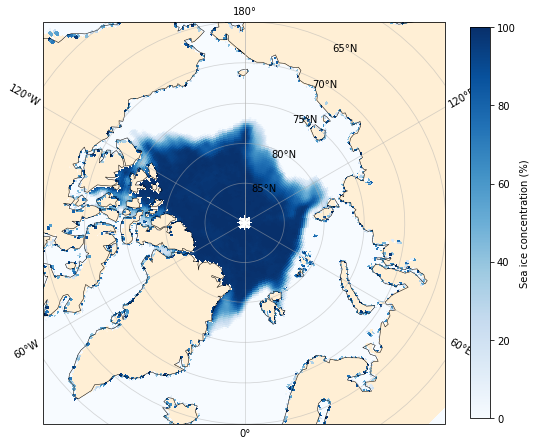

In [ ]:
# 1. Write one lines of code to select the sea ice concentration data from September 2019.
#    Save this as a new variable called "sic_2019".
sic_2019 = data['sea_ice_conc'].sel(time='2019-09')

# 2. This variable will still be 3-D, but the time dimension has just a single time.
#    To get rid of the unneeded time dimension and make the data truly 2-D,
#    use this code to "squeeze" out the time dimension.
sic_2019 = sic_2019.squeeze()

# 3. Use this code to set up a blank figure and set the axes to use Cartopy's Arctic map projection,
#    AKA a "northern polar stereographic" projection with a central longitude of 0°.
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))

# 4. Set the map extent to -180°E to 180°E in longitude, 65-90°N in latitude.
ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())

# 5. Plot the sea ice data (your variable "sic_2019") using pcolormesh().
#    - Recall that pcolormesh() takes the X values, Y values, and Z values as arguments.
#    - Don't forget to specify the 'transform' argument.
#    - Make sure sea ice concentration has units of 0% to 100%, not 0.0 to 1.0.
#    - Specify the colormap as 'Blues'.
pcm = ax.pcolormesh(sic_2019['lon'],sic_2019['lat'],100*sic_2019.values,
                    transform=ccrs.PlateCarree(),cmap='Blues')

# 6. Add a colorbar.
#    Then label the colorbar "Sea ice concentration (%)".
cbar = plt.colorbar(pcm,ax=ax,shrink=0.8)
cbar.set_label('Sea ice concentration (%)')

# 7. Try to add some formatting to the map. If you get stuck on any of these, just move on a different part.
#    - Add coastlines with a resolution of 110 m and line width of 0.5 to the map.
#    - Add gridlines to the map with a transparency of 50%.
#    - Add the land feature to the map with the color 'papayawhip'.
cs = ax.coastlines(resolution='110m',linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0.5)
ax.add_feature(cfeature.LAND, color='papayawhip')